# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [17]:
top5_item = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)

Text(0, 0.5, 'Quantity')

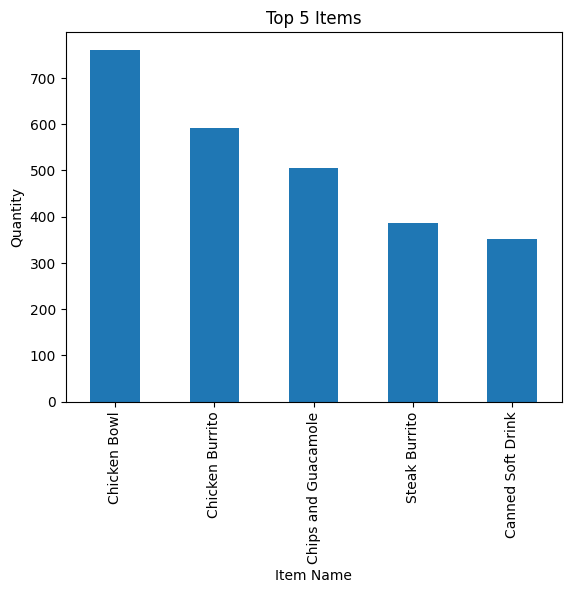

In [27]:
top5_item.plot(kind = 'bar')
plt.title('Top 5 Items')
plt.xlabel('Item Name')
plt.ylabel('Quantity')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [33]:
chipo['price']= chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_spending,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,$16.98 $16.98,16.98


In [35]:
chipo['item_spending'] = chipo['quantity'] * chipo['price']
chipo.head()


,order_id,quantity,item_name,choice_description,item_price,item_spending,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,33.96,16.98


In [49]:
item_price = chipo.groupby('order_id')[['quantity','item_spending']].sum()
item_price['item_spending'].idxmax()

1443

In [55]:
chipo[chipo['order_id']== 1443]

,order_id,quantity,item_name,choice_description,item_price,item_spending,price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,663.75,44.25
3599,1443,7,Bottled Water,NaN,$10.50,73.50,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],$6.49,6.49,6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$33.75,101.25,33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$35.00,140.00,35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$27.75,83.25,27.75
3604,1443,2,Bottled Water,NaN,$3.00,6.00,3.00


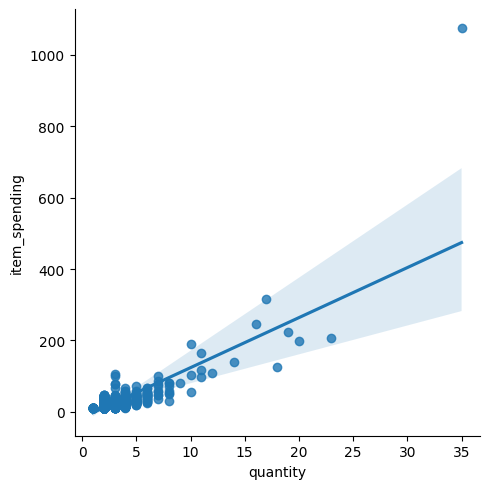

In [41]:
sns.lmplot(data = item_price, x = 'quantity', y = 'item_spending')

<Axes: xlabel='quantity', ylabel='item_spending'>

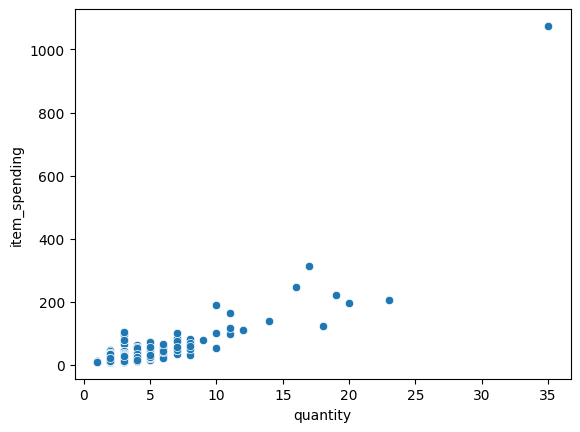

In [42]:
sns.scatterplot(data = item_price, x = 'quantity', y = 'item_spending')

### Step 7. BONUS: Create a question and a graph to answer your own question.